# Undistort and Transform Perspective


!['img'](undist-and-warp.png)


### Generate output like the image shown above. 

Write a function that takes distorted image as input and completes the following steps:

- Undistort the image using cv2.undistort() with mtx and dist
- Convert to grayscale
- Find the chessboard corners
- Draw corners
- Define 4 source points (the outer 4 corners detected in the chessboard pattern)
- Define 4 destination points (must be listed in the same order as src points!)
- Use cv2.getPerspectiveTransform() to get M, the transform matrix
- use cv2.warpPerspective() to apply M and warp your image to a top-down view

```
HINT: Source points are the x and y pixel values of any four corners on chessboard, you can extract these from the corners array output from cv2.findChessboardCorners(). 
Your destination points are the x and y pixel values of where you want those four corners to be mapped to in the output image.*
```

In [11]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )

# Read in the saved camera matrix
mtx = dist_pickle["mtx"]

# Read in the saved distortion coefficients
dist = dist_pickle["dist"]

# Read in an image
img = cv2.imread('test_image2.png')
nx = 8 # the number of inside corners in x
ny = 6 # the number of inside corners in y

def corners_unwarp(img, nx, ny, mtx, dist):
    undistorted = cv2.undistort(img, mtx, dist, None, mtx)
    gray = cv2.cvtColor(undistorted, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    print("corners.shape {0}".format(corners.shape))
    
    # print(corners)
    if ret:
        cv2.drawChessboardCorners(undistorted, (nx, ny), corners, ret)
    
        # b) define 4 source points src = np.float32([[,],[,],[,],[,]])        
        x1,y1 = corners[0].flatten()
        x2,y2 = corners[nx-1].flatten()
        x3,y3 = corners[-1].flatten()
        x4,y4 = corners[-nx].flatten()
        
        src = np.float32([[x1,y1],[x2,y2],[x3,y3],[x4,y4]])        
            #Note: you could pick any four of the detected corners 
                # as long as those four corners define a rectangle
                # One especially smart way to do this would be to use four well-chosen
                # corners that were automatically detected during the undistortion steps
                # We recommend using the automatic detection of corners in your code
                
        # c) define 4 destination points dst = np.float32([[,],[,],[,],[,]])
        dst = np.float32([[200,50],[1100,50], [1100,850],[200,850]])
        
        # d) use cv2.getPerspectiveTransform() to get M, the transform matrix
        M = cv2.getPerspectiveTransform(src, dst)
        
        # e) use cv2.warpPerspective() to warp your image to a top-down view
        warped = cv2.warpPerspective(undistorted, M, (img.shape[1], img.shape[0]), flags=cv2.INTER_LINEAR)
        
        # delete the next two lines
        return undistorted, warped, M

corners.shape (48, 1, 2)
corners.shape (48, 1, 2)


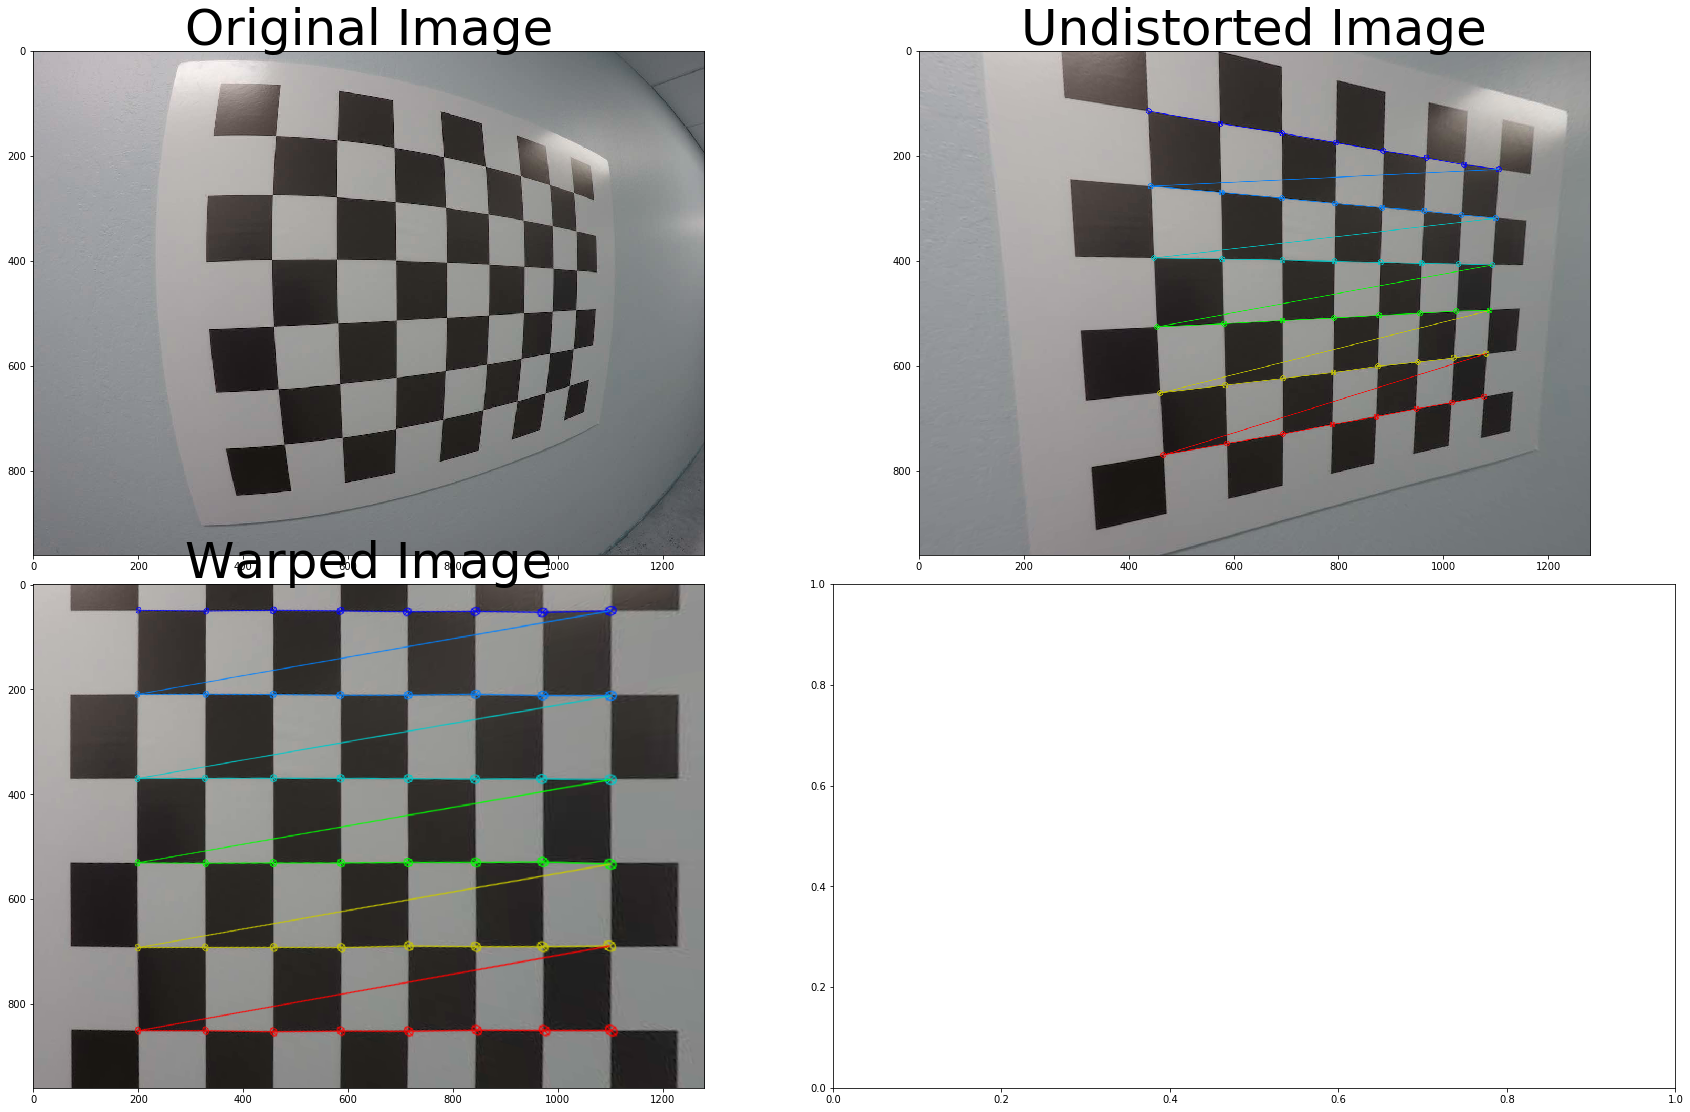

In [13]:
corners_unwarp(img, nx, ny, mtx, dist)

undistorted, warped, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(24, 16))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
ax3.imshow(warped)
ax3.set_title('Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)